In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Accidents0514.csv.zip", low_memory=False)
assert df["Accident_Index"].is_unique
df.dropna(subset=["Time"], inplace=True)
df["Date"] = pd.to_datetime(df["Date"] + df["Time"], format="%d/%m/%Y%H:%M")
df.sort_values(by="Date", inplace=True, ignore_index=True)
df.drop(columns=["Time", "LSOA_of_Accident_Location"], inplace=True)
df.info(verbose=True, show_counts=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640464 entries, 0 to 1640463
Data columns (total 30 columns):
 #   Column                                       Non-Null Count    Dtype         
---  ------                                       --------------    -----         
 0   Accident_Index                               1640464 non-null  object        
 1   Location_Easting_OSGR                        1640353 non-null  float64       
 2   Location_Northing_OSGR                       1640353 non-null  float64       
 3   Longitude                                    1640353 non-null  float64       
 4   Latitude                                     1640353 non-null  float64       
 5   Police_Force                                 1640464 non-null  int64         
 6   Accident_Severity                            1640464 non-null  int64         
 7   Number_of_Vehicles                           1640464 non-null  int64         
 8   Number_of_Casualties                         1640464

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,2005920500006,342200.0,850290.0,-2.967122,57.539108,92,3,2,1,2005-01-01 00:01:00,...,0,0,0,4,6,3,0,0,2,1
1,2005350005905,529710.0,277320.0,-0.095826,52.378530,35,3,1,1,2005-01-01 00:05:00,...,0,0,0,6,1,2,0,0,2,1
2,2005460104428,565170.0,172960.0,0.374698,51.431513,46,3,1,1,2005-01-01 00:10:00,...,0,0,0,4,1,1,0,0,1,1
3,200501YE80011,535230.0,192430.0,-0.048247,51.614411,1,3,1,1,2005-01-01 00:15:00,...,0,0,0,4,1,1,0,0,1,1
4,200501RY10089,551510.0,177770.0,0.180406,51.478547,1,3,1,1,2005-01-01 00:16:00,...,0,0,0,4,1,1,0,0,1,1


In [3]:
df_veh = pd.read_csv("Vehicles0514.csv.zip")
df_veh.info(verbose=True, show_counts=True)
print(df_veh.duplicated(subset=["Accident_Index", "Vehicle_Reference"]).sum())
df_veh.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004425 entries, 0 to 3004424
Data columns (total 22 columns):
 #   Column                            Non-Null Count    Dtype 
---  ------                            --------------    ----- 
 0   Accident_Index                    3004425 non-null  object
 1   Vehicle_Reference                 3004425 non-null  int64 
 2   Vehicle_Type                      3004425 non-null  int64 
 3   Towing_and_Articulation           3004425 non-null  int64 
 4   Vehicle_Manoeuvre                 3004425 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  3004425 non-null  int64 
 6   Junction_Location                 3004425 non-null  int64 
 7   Skidding_and_Overturning          3004425 non-null  int64 
 8   Hit_Object_in_Carriageway         3004425 non-null  int64 
 9   Vehicle_Leaving_Carriageway       3004425 non-null  int64 
 10  Hit_Object_off_Carriageway        3004425 non-null  int64 
 11  1st_Point_of_Impact               3004425 non-null

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0,0,0,0,0,...,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,11,0,4,0,3,0,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,1,11,0,17,0,0,0,4,0,...,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,2,9,0,2,0,0,0,0,0,...,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,1,9,0,18,0,0,0,0,0,...,1,15,2,49,8,1769,1,4,2,1


In [4]:
df_cas = pd.read_csv("Casualties0514.csv.zip")
df_cas.info(verbose=True, show_counts=True)
print(df_cas.duplicated(subset=["Accident_Index", "Vehicle_Reference", "Casualty_Reference"]).sum())
df_cas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216720 entries, 0 to 2216719
Data columns (total 15 columns):
 #   Column                              Non-Null Count    Dtype 
---  ------                              --------------    ----- 
 0   Accident_Index                      2216720 non-null  object
 1   Vehicle_Reference                   2216720 non-null  int64 
 2   Casualty_Reference                  2216720 non-null  int64 
 3   Casualty_Class                      2216720 non-null  int64 
 4   Sex_of_Casualty                     2216720 non-null  int64 
 5   Age_of_Casualty                     2216720 non-null  int64 
 6   Age_Band_of_Casualty                2216720 non-null  int64 
 7   Casualty_Severity                   2216720 non-null  int64 
 8   Pedestrian_Location                 2216720 non-null  int64 
 9   Pedestrian_Movement                 2216720 non-null  int64 
 10  Car_Passenger                       2216720 non-null  int64 
 11  Bus_or_Coach_Passenger  

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


## Transforming some casualty features to later aggregate down to the (accident, vehicle) level

In [5]:
df_cas = df_cas.merge(
    pd.get_dummies(df_cas["Sex_of_Casualty"])[[1]].rename(columns={1: "Male_Casaulties"}),
    left_index=True,
    right_index=True
).drop(columns=["Sex_of_Casualty"])

In [6]:
df_cas = df_cas.merge(
    (pd.get_dummies(df_cas["Casualty_Class"])[[2, 3]]
     .rename(columns={2: "Passenger", 3: "Pedestrian"})),
    left_index=True,
    right_index=True
).drop(columns=["Casualty_Class"])

In [7]:
df_cas = df_cas.merge(
    (pd.get_dummies(df_cas["Casualty_Severity"])
     .rename(columns={1: "CasaultyFatal", 2: "CasaultySerious", 3: "CasaultySlight"})),
    left_index=True,
    right_index=True
).drop(columns=["Casualty_Severity"])

In [8]:
df_cas["Pedestrian_Location"] = df_cas["Pedestrian_Location"].map({1: 1, 2: 1, 3: 1, 4: 1, 5: 1}).fillna(0).astype(int)
df_cas.rename(columns={"Pedestrian_Location": "Pedestrian_isCrossing"}, inplace=True)

In [9]:
df_cas = df_cas.merge(
    (pd.get_dummies(df_cas["Car_Passenger"])[[0, 1, 2]]
     .rename(columns={0: "NotPassenger", 1: "FrontPassenger", 2: "RearPassenger"})),
    left_index=True,
    right_index=True
).drop(columns=["Car_Passenger"])

In [10]:
df_cas["Pedestrian_Road_Maintenance_Worker"] = (df_cas["Pedestrian_Road_Maintenance_Worker"]
                                                .map({1: 1})
                                                .fillna(0)
                                                .astype(int))

In [11]:
casaulty_type_mapper = {
    1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 23: 1, 97: 1,
    10: 2, 11: 2, 19: 2, 20: 2, 21: 2
}
df_cas["Casualty_Type"] = df_cas["Casualty_Type"].map(casaulty_type_mapper).fillna(0).astype(int)
df_cas = df_cas.merge(
    (pd.get_dummies(df_cas["Casualty_Type"])
     .rename(columns={0: "CasaultyOther", 1: "CasaultyTwoWheeler", 2: "CasaultyHeavyVehicle"})),
    left_index=True,
    right_index=True
).drop(columns=["Casualty_Type"])

In [12]:
df_cas = df_cas.merge(
    (pd.get_dummies(df_cas["Casualty_Home_Area_Type"])
     .rename(columns={1: "CasaultyAreaUrban", 2: "CasaultyAreaSmallTown", 3: "CasaultyAreaRural", -1: "CasaultyAreaOther"})),
    left_index=True,
    right_index=True
).drop(columns=["Casualty_Home_Area_Type"])

In [13]:
df_cas.drop(columns=["Age_Band_of_Casualty", "Pedestrian_Movement", "Bus_or_Coach_Passenger"], inplace=True)

In [14]:
df_cas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216720 entries, 0 to 2216719
Data columns (total 22 columns):
 #   Column                              Dtype 
---  ------                              ----- 
 0   Accident_Index                      object
 1   Vehicle_Reference                   int64 
 2   Casualty_Reference                  int64 
 3   Age_of_Casualty                     int64 
 4   Pedestrian_isCrossing               int64 
 5   Pedestrian_Road_Maintenance_Worker  int64 
 6   Male_Casaulties                     uint8 
 7   Passenger                           uint8 
 8   Pedestrian                          uint8 
 9   CasaultyFatal                       uint8 
 10  CasaultySerious                     uint8 
 11  CasaultySlight                      uint8 
 12  NotPassenger                        uint8 
 13  FrontPassenger                      uint8 
 14  RearPassenger                       uint8 
 15  CasaultyOther                       uint8 
 16  CasaultyTwoWheeler

## Aggregating down to the vehicle level

In [15]:
non_sum_cols = {"Accident_Index", "Vehicle_Reference", "Casualty_Reference", "Age_of_Casualty"}
casaulty_agg = {
    "Age_of_Casualty": ["min", "mean", "max"],
    **{col: "sum" for col in df_cas.columns if col not in non_sum_cols}
}
df_cas_agg = df_cas.groupby(["Accident_Index", "Vehicle_Reference"]).agg(casaulty_agg)
df_cas_agg.columns = ['_'.join(col).strip() for col in df_cas_agg.columns]
df_cas_agg.reset_index(inplace=True)
df_cas_agg.head()

,Accident_Index,Vehicle_Reference,Age_of_Casualty_min,Age_of_Casualty_mean,Age_of_Casualty_max,Pedestrian_isCrossing_sum,Pedestrian_Road_Maintenance_Worker_sum,Male_Casaulties_sum,Passenger_sum,Pedestrian_sum,...,NotPassenger_sum,FrontPassenger_sum,RearPassenger_sum,CasaultyOther_sum,CasaultyTwoWheeler_sum,CasaultyHeavyVehicle_sum,CasaultyAreaOther_sum,CasaultyAreaUrban_sum,CasaultyAreaSmallTown_sum,CasaultyAreaRural_sum
0,200501BS00001,1,37,37.0,37,1,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
1,200501BS00002,1,37,37.0,37,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
2,200501BS00003,2,62,62.0,62,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
3,200501BS00004,1,30,30.0,30,1,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
4,200501BS00005,1,49,49.0,49,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0


In [16]:
df_cas_agg.duplicated(subset=["Accident_Index", "Vehicle_Reference"]).sum()

0

## Combining the vehicle and aggregated casualty data

In [17]:
metadata = df_veh.merge(df_cas_agg, on=["Accident_Index", "Vehicle_Reference"], how="outer")
metadata.duplicated(subset=["Accident_Index", "Vehicle_Reference"]).sum()

0

## Transforming some vehicle features to later aggregate down to the accident level

In [18]:
vehicle_type_mapper = {
    1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 23: 1, 97: 1,
    10: 2, 11: 2, 19: 2, 20: 2, 21: 2
}
metadata["Vehicle_Type"] = metadata["Vehicle_Type"].map(vehicle_type_mapper).fillna(0).astype(int)
metadata = metadata.merge(
    (pd.get_dummies(metadata["Vehicle_Type"])
     .rename(columns={0: "VehTypeOther", 1: "VehTypeTwoWheeler", 2: "VehTypeHeavyVehicle"})),
    left_index=True,
    right_index=True
).drop(columns=["Vehicle_Type"])

In [19]:
vehicle_manoeuvre_mapper = {
    11: 1, 12: 1,
    13: 2, 14: 2, 15: 2
}
metadata["Vehicle_Manoeuvre"] = metadata["Vehicle_Manoeuvre"].map(vehicle_manoeuvre_mapper).fillna(0).astype(int)
metadata = metadata.merge(
    (pd.get_dummies(metadata["Vehicle_Manoeuvre"])
     .rename(columns={0: "VehManOther", 1: "VehManChangeLane", 2: "VehManOvertaking"})),
    left_index=True,
    right_index=True
).drop(columns=["Vehicle_Manoeuvre"])

In [20]:
junction_loc_mapper = {
    3: 1, 4: 1, 5: 2, 6: 2
}
metadata["Junction_Location"] = metadata["Junction_Location"].map(vehicle_manoeuvre_mapper).fillna(0).astype(int)
metadata = metadata.merge(
    (pd.get_dummies(metadata["Junction_Location"])
     .rename(columns={0: "JunctionLocOther", 1: "JunctionLocRoundabout", 2: "JunctionLocMainRoad"})),
    left_index=True,
    right_index=True
).drop(columns=["Junction_Location"])

In [21]:
metadata = metadata.merge(
    (pd.get_dummies(metadata["Skidding_and_Overturning"])[[1, 2, 3, 4, 5]]
     .rename(columns={1: "Skidded", 2: "SkiddedAndOverturn",
                      3: "Jackknifed", 4: "JackknifedAndOverturned", 5: "Overturned"})),
    left_index=True,
    right_index=True
).drop(columns=["Skidding_and_Overturning"])

In [22]:
hit_obj_cway_mapper = {
    1: 1, 2: 1, 3: 1, 4: 1,
    8: 2, 9: 2
}
metadata["Hit_Object_off_Carriageway"] = metadata["Hit_Object_off_Carriageway"].map(hit_obj_cway_mapper).fillna(0).astype(int)
metadata = metadata.merge(
    (pd.get_dummies(metadata["Hit_Object_off_Carriageway"])
     .rename(columns={0: "HitObjectOther", 1: "HitObjectVertical", 2: "HitObjectDown"})),
    left_index=True,
    right_index=True
).drop(columns=["Hit_Object_off_Carriageway"])

In [23]:
metadata = metadata.merge(
    (pd.get_dummies(metadata["1st_Point_of_Impact"])[[0, 1, 2, 3, 4]]
     .rename(columns={0: "PointofImpactNone", 1: "PointofImpactFront",
                      2: "PointofImpactBack", 3: "PointofImpactOffside", 4: "PointofImpactNearside"})),
    left_index=True,
    right_index=True
).drop(columns=["1st_Point_of_Impact"])

In [24]:
metadata = metadata.merge(
    (pd.get_dummies(metadata["Sex_of_Driver"], drop_first=True)
     .rename(columns={1: "DriverMale", 2: "DriverFemale", 3: "DriverUnknown"})),
    left_index=True,
    right_index=True
).drop(columns=["Sex_of_Driver"])

In [25]:
metadata = metadata.merge(
    pd.get_dummies(metadata["Driver_IMD_Decile"], drop_first=True),
    left_index=True,
    right_index=True
).drop(columns=["Driver_IMD_Decile"])
metadata.rename(columns={i: f"DriverIMD{i}" for i in range(1, 11)}, inplace=True)

In [26]:
metadata.drop(columns=["Towing_and_Articulation",
                       "Vehicle_Location-Restricted_Lane",
                       "Hit_Object_in_Carriageway",
                       "Vehicle_Leaving_Carriageway",
                       "Was_Vehicle_Left_Hand_Drive?",
                       "Journey_Purpose_of_Driver",
                       "Age_Band_of_Driver",
                       "Engine_Capacity_(CC)",
                       "Propulsion_Code",
                       "Driver_Home_Area_Type"], inplace=True)

In [27]:
metadata.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3004425 entries, 0 to 3004424
Data columns (total 58 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   Accident_Index                          3004425 non-null  object 
 1   Vehicle_Reference                       3004425 non-null  int64  
 2   Age_of_Driver                           3004425 non-null  int64  
 3   Age_of_Vehicle                          3004425 non-null  int64  
 4   Age_of_Casualty_min                     1859795 non-null  float64
 5   Age_of_Casualty_mean                    1859795 non-null  float64
 6   Age_of_Casualty_max                     1859795 non-null  float64
 7   Pedestrian_isCrossing_sum               1859795 non-null  float64
 8   Pedestrian_Road_Maintenance_Worker_sum  1859795 non-null  float64
 9   Male_Casaulties_sum                     1859795 non-null  float64
 10  Passenger_sum                 

## Aggregating the metadata down to the accident level

In [28]:
non_sum_cols = {"Accident_Index", "Vehicle_Reference",
                "Age_of_Driver", "Age_of_Vehicle",
                "Age_of_Casualty_min", "Age_of_Casualty_mean", "Age_of_Casualty_max"}

metadata_agg = {
    "Age_of_Driver": ["min", "mean", "max"],
    "Age_of_Vehicle": ["min", "mean", "max"],
    "Age_of_Casualty_min": "min",
    "Age_of_Casualty_mean": "mean",
    "Age_of_Casualty_max": "max",
    **{col: "sum" for col in metadata.columns if col not in non_sum_cols}
}

In [29]:
metadata = metadata.groupby("Accident_Index").agg(metadata_agg)
metadata.columns = ['_'.join(col).strip() for col in metadata.columns]
metadata.reset_index(inplace=True)
metadata.head()

,Accident_Index,Age_of_Driver_min,Age_of_Driver_mean,Age_of_Driver_max,Age_of_Vehicle_min,Age_of_Vehicle_mean,Age_of_Vehicle_max,Age_of_Casualty_min_min,Age_of_Casualty_mean_mean,Age_of_Casualty_max_max,...,DriverIMD1_sum,DriverIMD2_sum,DriverIMD3_sum,DriverIMD4_sum,DriverIMD5_sum,DriverIMD6_sum,DriverIMD7_sum,DriverIMD8_sum,DriverIMD9_sum,DriverIMD10_sum
0,200501BS00001,74,74.0,74,-1,-1.0,-1,37.0,37.0,37.0,...,0,0,0,0,0,0,1,0,0,0
1,200501BS00002,42,42.0,42,3,3.0,3,37.0,37.0,37.0,...,0,0,0,0,0,0,0,0,0,0
2,200501BS00003,35,48.5,62,5,5.5,6,62.0,62.0,62.0,...,1,1,0,0,0,0,0,0,0,0
3,200501BS00004,49,49.0,49,4,4.0,4,30.0,30.0,30.0,...,0,1,0,0,0,0,0,0,0,0
4,200501BS00005,49,49.0,49,10,10.0,10,49.0,49.0,49.0,...,0,0,0,0,0,0,0,0,0,0


## Combining the accident level aggregated metadata with the accident data

In [30]:
df = df.merge(metadata, on="Accident_Index", how="left")

In [31]:
df[['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude']].corr()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude
Location_Easting_OSGR,1.000000,-0.416091,0.999352,-0.418006
Location_Northing_OSGR,-0.416091,1.000000,-0.427063,0.999973
Longitude,0.999352,-0.427063,1.000000,-0.428876
Latitude,-0.418006,0.999973,-0.428876,1.000000


In [32]:
df.drop(columns=["Location_Easting_OSGR",
                 "Location_Northing_OSGR",
                 "Police_Force",
                 "Local_Authority_(Highway)"], inplace=True)
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640464 entries, 0 to 1640463
Data columns (total 86 columns):
 #   Column                                       Non-Null Count    Dtype         
---  ------                                       --------------    -----         
 0   Accident_Index                               1640464 non-null  object        
 1   Longitude                                    1640353 non-null  float64       
 2   Latitude                                     1640353 non-null  float64       
 3   Accident_Severity                            1640464 non-null  int64         
 4   Number_of_Vehicles                           1640464 non-null  int64         
 5   Number_of_Casualties                         1640464 non-null  int64         
 6   Date                                         1640464 non-null  datetime64[ns]
 7   Day_of_Week                                  1640464 non-null  int64         
 8   Local_Authority_(District)                   1640464

## Including time-based features to encode point in day and point in week 

In [33]:
day_of_week_x = np.cos(np.pi*(df["Day_of_Week"]/3 + df["Date"].dt.hour/24 + df["Date"].dt.minute/60))
day_of_week_y = np.sin(np.pi*(df["Day_of_Week"]/3 + df["Date"].dt.hour/24 + df["Date"].dt.minute/60))

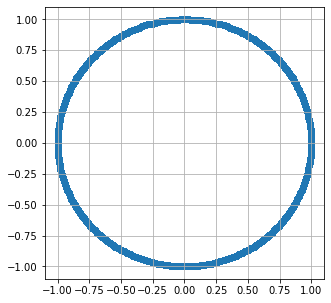

In [34]:
plt.figure(figsize=(5, 5))
plt.scatter(day_of_week_x, day_of_week_y)
plt.grid()

In [35]:
df.drop(columns=["Day_of_Week"], inplace=True)

In [36]:
hour_x = np.cos(np.pi*(df["Date"].dt.hour/12 + df["Date"].dt.minute/60))
hour_y = np.sin(np.pi*(df["Date"].dt.hour/12 + df["Date"].dt.minute/60))

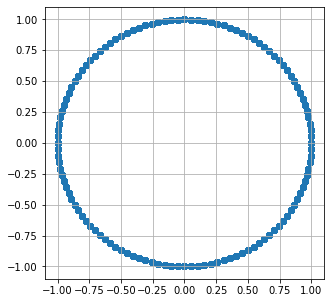

In [37]:
plt.figure(figsize=(5, 5))
plt.scatter(hour_x, hour_y)
plt.grid()

In [38]:
df["day_of_week_x"] = day_of_week_x
df["day_of_week_y"] = day_of_week_y
df["hour_x"] = hour_x
df["hour_y"] = hour_y

In [39]:
df["Accident_Severity"] = df.pop("Accident_Severity")

In [40]:
df.to_parquet("combined.parquet")